In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
d = pd.read_csv('Bengaluru_House_Data.csv')
d.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
d.shape

(13320, 9)

In [4]:
d.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [5]:
d.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
d2 = d.drop(['area_type', 'availability','society','balcony'], axis=1)
d2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
d2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
d2 = d2.dropna()

In [9]:
d2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
d2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
d2['bhk'] = d2['size'].apply(lambda x : int(x[0]))

In [12]:
d2['bhk'].head(15)

0     2
1     4
2     3
3     3
4     2
5     2
6     4
7     4
8     3
9     6
10    3
11    4
12    2
13    2
14    3
Name: bhk, dtype: int64

In [13]:
d2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def float_con(x):
  try:
    float(x)
  except:
    return False
  return True

In [15]:
d2[~d2['total_sqft'].apply(float_con)].head(15)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [16]:
def con_to_num(x):
  t = x.split('-')
  if len(t) == 2:
    return (float(t[0]) + float(t[1]))/2
  try:
    return float(x)
  except:
    return None

In [17]:
d3 = d2.copy()
d3['total_sqft'] = d3['total_sqft'].apply(con_to_num)
d3.head(15)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


#Feature Engineering

In [18]:
d4 = d3.copy()
d4['price_per_sqft'] = (d4['price']*100000) / d4['total_sqft']
d4.head(15)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [19]:
loc_stat = d4.groupby("location")['location'].agg('count').sort_values(ascending=False)

In [20]:
len(loc_stat[loc_stat<=10])

1063

In [21]:
loc_less_ten = loc_stat[loc_stat<=10]

In [22]:
len(d4.location.unique())

1304

In [23]:
d4.location = d4.location.apply(lambda x : 'other' if x in loc_less_ten else x)
len(d4.location.unique())

242

In [24]:
d4.head(15)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [25]:
d4[d4['total_sqft']/d4['bhk']<300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [26]:
d5 = d4[~(d4['total_sqft']/d4['bhk']<300)]
d5.shape

(12518, 7)

In [27]:
d5.price_per_sqft.describe()

count     12472.000000
mean       6321.224286
std        4188.395933
min         267.829813
25%        4210.526316
50%        5295.544522
75%        6929.522602
max      176470.588235
Name: price_per_sqft, dtype: float64

In [28]:
def rem_pps_ol(df):
  df_res = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m = np.mean(subdf.price_per_sqft)
    sd = np.std(subdf.price_per_sqft)
    red_df = subdf[(subdf.price_per_sqft>(m-sd)) & (subdf.price_per_sqft<(m+sd))]
    df_res = pd.concat([df_res, red_df], ignore_index=True)
  return df_res

In [29]:
d6 = rem_pps_ol(d5)
d6.shape

(10258, 7)

In [30]:
def scatter_plot(df, loc):
  bhk2 = df[(df.location == loc) & (df.bhk == 2)]
  bhk3 = df[(df.location == loc) & (df.bhk == 3)]

  sns.scatterplot(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK')
  sns.scatterplot(bhk3.total_sqft, bhk3.price, color='orange', label='3 BHK')

  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price (Lakh Indian Rupees)")
  plt.title(loc)
  plt.legend()

C:\Users\Parthiv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Parthiv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


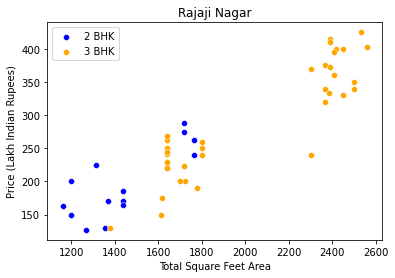

In [31]:
scatter_plot(d6,"Rajaji Nagar")

C:\Users\Parthiv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Parthiv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


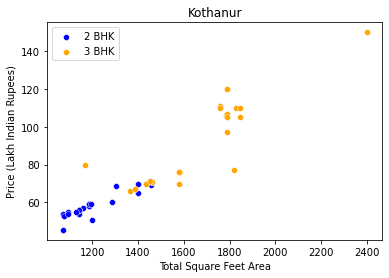

In [32]:
scatter_plot(d6,"Kothanur")

In [33]:
def rem_bhk_ol(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [34]:
d7 = rem_bhk_ol(d6)
d7.shape

(7320, 7)

C:\Users\Parthiv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Parthiv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


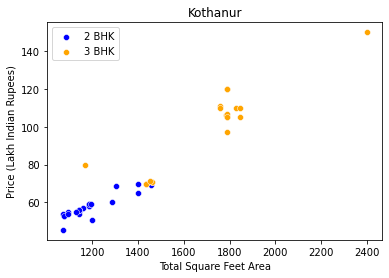

In [35]:
scatter_plot(d7,"Kothanur")

C:\Users\Parthiv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Parthiv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


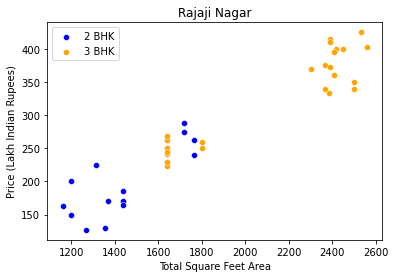

In [36]:
scatter_plot(d7,"Rajaji Nagar")

Text(0, 0.5, 'Count')

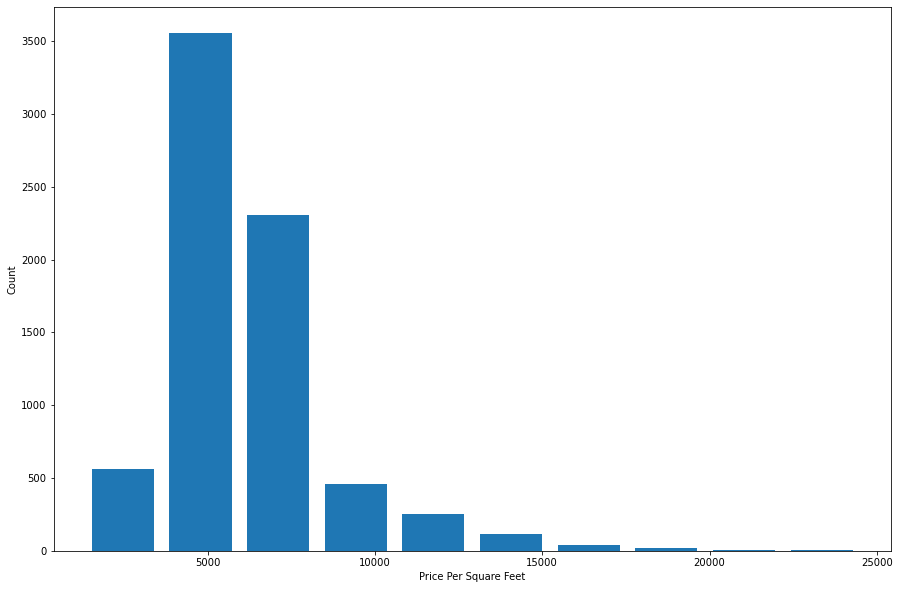

In [37]:
plt.rcParams["figure.figsize"] = (15,10)
plt.hist(d7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [38]:
d7.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 10., 12., 16., 15.,
       13.])

Text(0, 0.5, 'Count')

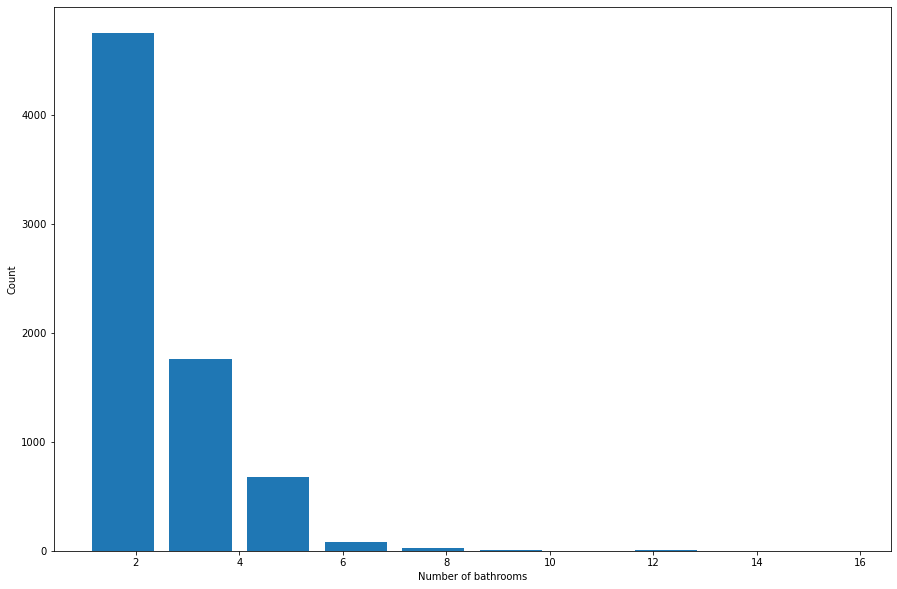

In [39]:
plt.hist(d7.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [40]:
d7[d7.bath > d7.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5132,Munnekollal,10 Bedroom,7200.0,10.0,200.0,1,2777.777778
5241,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
5280,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,1,4000.000000
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8026,other,11 BHK,5000.0,9.0,360.0,1,7200.000000
8258,other,10 Bedroom,750.0,10.0,90.0,1,12000.000000
8416,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
8492,other,10 BHK,12000.0,12.0,525.0,1,4375.000000
8581,other,16 BHK,10000.0,16.0,550.0,1,5500.000000


In [41]:
d8 = d7[d7.bath < d7.bhk+2]
d8.shape

(7233, 7)

In [42]:
d9 = d8.drop(['size','price_per_sqft'],axis='columns')
d9.head(15)

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2
6,Devarachikkanahalli,1130.0,2.0,36.0,2
7,Devarachikkanahalli,1417.0,2.0,76.0,3
8,Devarachikkanahalli,1230.0,2.0,58.0,2
9,Devarachikkanahalli,1705.0,3.0,75.0,3
10,Devarachikkanahalli,1116.0,2.0,47.0,2


In [43]:
dum = pd.get_dummies(d9.location)

In [44]:
d10 = pd.concat([d9,dum.drop('other', axis=1)], axis=1)
d10.head()

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
d11 = d10.drop('location', axis=1)
d11.head()

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,43.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Model


In [46]:
x = d11.drop('price', axis=1)
y = d11.price

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [48]:
from sklearn.linear_model import LinearRegression
z = LinearRegression()
z.fit(x_train, y_train)

LinearRegression()

In [49]:
z.score(x_test, y_test)

0.852407837096391

In [50]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

ss = ShuffleSplit(n_splits=5, test_size=0.3, random_state=5)

cross_val_score(z, x, y, cv=ss)


array([0.82023705, 0.84842321, 0.88096795, 0.79276099, 0.82850368])

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


def bestmodel(x,y):

    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    for name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=ss, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [52]:
bestmodel(x,y)

,model,best_score,best_params
0,linear_regression,0.834179,{'normalize': True}
1,lasso,0.696525,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.715149,"{'criterion': 'mse', 'splitter': 'random'}"


# Dumped files


In [53]:
d11.columns

Index(['total_sqft', 'bath', 'price', 'bhk', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=245)

In [54]:
def price_pred(location,sqft,bath,bhk):
   l_ind = np.where(x.columns == location)[0][0]

   a = np.zeros(len(x.columns))
   a[0] = sqft
   a[1] = bath
   a[2] = bhk
   if l_ind >= 0:
     a[l_ind] = 1

   return z.predict([a])[0]                                     
                                  

In [55]:
price_pred('1st Phase JP Nagar',1000, 2, 3)

82.5087362074588

In [56]:
import pickle as pk

pk.dump(z, open('model.pkl', 'wb'))

In [57]:
import json as js
columns = {
    'data_columns' : [i.lower() for i in x.columns]
}

with open("columns.json","w") as f:
    f.write(js.dumps(columns))